# IMPORT LIBRARIES/DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#!pip install sklearn
#!pip install tensorflow
#!pip install tf-nightly
#!pip install -U efficientnet
!pip install jupyterthemes

#import tensorflow as tf
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.compat.v1.Session(config=config)


     |████████████████████████████████| 7.0 MB 5.3 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 9.9 MB 74.9 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 428 kB 80.3 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.8 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is 

In [ ]:
# import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.efficientnet import EfficientNetB7
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

print(f"Tensor Flow Version: {tf.__version__}")
#print(f"Keras Version: {tensorflow.keras.__version__}")
print()
#print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.7.0

Pandas 1.3.5
GPU is NOT AVAILABLE


In [ ]:
%cd /content/drive/MyDrive/Skripsi/Skins01


/content/drive/MyDrive/Skripsi/Skins01


In [ ]:
# List all folders under training
os.listdir('./training')

['chickenpox', 'keratosis', 'dermatofibroma', 'eczema', 'scabies', 'psoriasis']

In [ ]:
# Check the number of images in training, validation and evaluation dataset
train = []
test = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./training'):
    train.extend(os.listdir(os.path.join('training', i)))
    test.extend(os.listdir(os.path.join('evaluation', i))) 
    
print('Number of train images: {} \nNumber of test images: {}'.format(len(train),len(test)))


Number of train images: 828 
Number of test images: 338


In [ ]:
train

['ISIC_0072907.jpg',
 'ISIC_0072853.jpg',
 'ISIC_0072852.jpg',
 'ISIC_0072871.jpg',
 'ISIC_0072897.jpg',
 'ISIC_0072835.jpg',
 'ISIC_0072839.jpg',
 'ISIC_0072935.jpg',
 'ISIC_0072877.jpg',
 'ISIC_0072931.jpg',
 'ISIC_0072933.jpg',
 'ISIC_0072914.jpg',
 'ISIC_0072851.jpg',
 'ISIC_0072916.jpg',
 'ISIC_0072842.jpg',
 'ISIC_0072880.jpg',
 'ISIC_0072869.jpg',
 'ISIC_0073002.jpg',
 'ISIC_0073059.jpg',
 'ISIC_0073061.jpg',
 'ISIC_0073063.jpg',
 'ISIC_0073033.jpg',
 'ISIC_0072978.jpg',
 'ISIC_0072988.jpg',
 'ISIC_0073019.jpg',
 'ISIC_0073047.jpg',
 'ISIC_0073010.jpg',
 'ISIC_0073030.jpg',
 'ISIC_0072993.jpg',
 'ISIC_0072951(1).jpg',
 'ISIC_0073023.jpg',
 'ISIC_0073049.jpg',
 'ISIC_0072951.jpg',
 'ISIC_0072994.jpg',
 'ISIC_0073037.jpg',
 'ISIC_0073028.jpg',
 'ISIC_0072969.jpg',
 'ISIC_0072942.jpg',
 'ISIC_0072974.jpg',
 'ISIC_0073022.jpg',
 'ISIC_0073009.jpg',
 'ISIC_0073055.jpg',
 'ISIC_0073113.jpg',
 'ISIC_0073111.jpg',
 'ISIC_0073079.jpg',
 'ISIC_0073066.jpg',
 'ISIC_0073082.jpg',
 'ISIC_007

# TASK #3: PERFORM DATA EXPLORATION AND DATA VISUALIZATION

In [ ]:
train_class = os.listdir(os.path.join('training','keratosis'))
train_class

['ISIC_3409440.jpg',
 'ISIC_2985753.jpg',
 'ISIC_2488468.jpg',
 'ISIC_3047981.jpg',
 'ISIC_3417390.jpg',
 'ISIC_3522554.jpg',
 'ISIC_4342416.jpg',
 'ISIC_3698568.jpg',
 'ISIC_3610783.jpg',
 'ISIC_3577410.jpg',
 'ISIC_4354857.jpg',
 'ISIC_4354896.jpeg',
 'ISIC_5136612.jpg',
 'ISIC_4891233.jpg',
 'ISIC_5177353.jpg',
 'ISIC_5215191.jpeg',
 'ISIC_5278307.jpeg',
 'ISIC_5399828.jpg',
 'ISIC_5402119.jpg',
 'ISIC_5407240.jpeg',
 'ISIC_5469457.jpg',
 'ISIC_5576241.jpg',
 'ISIC_5573611.jpg',
 'ISIC_5634573.jpg',
 'ISIC_5787278.jpg',
 'ISIC_5829749.jpg',
 'ISIC_5722465.jpg',
 'ISIC_5958409.jpeg',
 'ISIC_6098213.jpg',
 'ISIC_6413890.jpg',
 'ISIC_6416127.jpg',
 'ISIC_6446825.jpg',
 'ISIC_6433084.jpg',
 'ISIC_6555039.jpg',
 'ISIC_6511141.jpeg',
 'ISIC_6594555.jpeg',
 'ISIC_6596403.jpg',
 'ISIC_6810183.jpg',
 'ISIC_6893147.jpg',
 'ISIC_6931024.jpg',
 'ISIC_6709150.jpg',
 'ISIC_7194695.jpg',
 'ISIC_7282441.jpg',
 'ISIC_7050773.jpeg',
 'ISIC_7833008.jpg',
 'ISIC_7866488.jpg',
 'ISIC_8022913.jpeg',
 'IS

In [ ]:
# Visualize images di the dataset

fig, axs = plt.subplots(6, 5, figsize = (32,32))
count = 0
# for every class in the dataset
for i in os.listdir('./training'):
  # get the list of all images that belong to a particular class
  train_class = os.listdir(os.path.join('training', i))
  
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('training', i, train_class[j])
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(PIL.Image.open(img))  
  count += 1

fig.tight_layout()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# check jumlah image di tiap kelas

No_images_per_class = []
Class_name = []
for i in os.listdir('./training'):
  Class_name.append(i)
  train_class = os.listdir(os.path.join('training',i))
  print('Number of images in {}={}\n'.format(i,len(train_class)))
  No_images_per_class.append(len(train_class))

Number of images in chickenpox=149

Number of images in keratosis=138

Number of images in dermatofibroma=62

Number of images in eczema=172

Number of images in scabies=164

Number of images in psoriasis=143



In [ ]:
No_images_per_class = []
Class_name = []
for i in os.listdir('./evaluation'):
  Class_name.append(i)
  test_class = os.listdir(os.path.join('evaluation',i))
  print('Number of images in {}={}\n'.format(i,len(test_class)))
  No_images_per_class.append(len(test_class))

Number of images in eczema=52

Number of images in keratosis=59

Number of images in psoriasis=60

Number of images in dermatofibroma=27

Number of images in chickenpox=78

Number of images in scabies=62



In [ ]:
No_images_per_class

[52, 59, 60, 27, 78, 62]

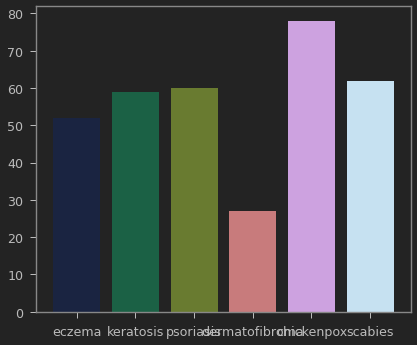

In [ ]:
# visualize the number of images in each class in the training dataset

fig = plt.figure(figsize=(6,5))
plt.bar(Class_name, No_images_per_class, color = sns.color_palette("cubehelix",len(Class_name)))
fig.tight_layout()

# PERFORM IMAGE AUGMENTATION AND CREATE DATA GENERATOR

In [ ]:
# Untuk mentraining data generator, gunakan normalisasi, zooming range, horizontal flip, brightness range
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                zoom_range = 0.2,
                horizontal_flip = True,
                vertical_flip=True,
                brightness_range=None)


test_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, height_shift_range=0.2)

In [ ]:
# Create data generator for training, validation and test dataset.
train_generator = train_datagen.flow_from_directory(
        'training',
        target_size=(256, 256),
        batch_size=40,
        class_mode='categorical')


Found 828 images belonging to 6 classes.


In [ ]:

# Create data generator for training, validation and test dataset.
test_generator = test_datagen.flow_from_directory(
        'evaluation',
        target_size=(256, 256),
        batch_size=40,
        class_mode='categorical')


Found 338 images belonging to 6 classes.


In [ ]:
train_generator

In [ ]:
test_generator

# BUILD DEEP LEARNING MODEL USING PRE-TRAINED InceptionResnet


In [ ]:
# load model inception resnetv2 
basemodel = InceptionV3(weights = 'imagenet', include_top = False, input_tensor=Input(shape = (256,256,3)))


87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# print model summary
basemodel.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# Freeze the basemodel weights (supaya weight tdk berubah saat training)
basemodel.trainable = False

In [ ]:
# Add classification head to the model
headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name ='global_average_pool')(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = 'relu', name = 'dense_1')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = 'relu', name = 'dense_2')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(6, activation = 'softmax', name = 'dense_3')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

# COMPILE AND TRAIN DEEP LEARNING MODEL

In [ ]:
# compile modelnya

model.compile(loss = 'categorical_crossentropy', 
              optimizer = SGD(learning_rate =0.01, momentum =0.9),
              metrics=['accuracy'])


In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, 
                    steps_per_epoch= train_generator.n // 40, epochs = 24, 
                    validation_data= train_generator, 
                    validation_steps= len(test_generator), 
                    callbacks=[checkpointer, earlystopping])


Epoch 1/24
20/20 [==============================] - ETA: 0s - loss: 1.7512 - accuracy: 0.2525
Epoch 00001: val_loss improved from inf to 1.41433, saving model to weights.hdf5
20/20 [==============================] - 134s 7s/step - loss: 1.7512 - accuracy: 0.2525 - val_loss: 1.4143 - val_accuracy: 0.4833
Epoch 2/24
20/20 [==============================] - ETA: 0s - loss: 1.3573 - accuracy: 0.4518
Epoch 00002: val_loss improved from 1.41433 to 1.10419, saving model to weights.hdf5
20/20 [==============================] - 103s 5s/step - loss: 1.3573 - accuracy: 0.4518 - val_loss: 1.1042 - val_accuracy: 0.5917
Epoch 3/24
20/20 [==============================] - ETA: 0s - loss: 1.1393 - accuracy: 0.5647
Epoch 00003: val_loss improved from 1.10419 to 0.96370, saving model to weights.hdf5
20/20 [==============================] - 102s 5s/step - loss: 1.1393 - accuracy: 0.5647 - val_loss: 0.9637 - val_accuracy: 0.6333
Epoch 4/24
20/20 [==============================] - ETA: 0s - loss: 1.1391 - 

# FINE TUNE THE TRAINED MODEL

In [ ]:
# unfreeze the weights di base model
basemodel.trainable = True

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights_fine.hdf5", verbose=1, save_best_only=True)

In [ ]:
# fine tune model dengan learning rate yang rendah
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator, 
                    steps_per_epoch= train_generator.n // 40,
                    epochs = 24,
                    validation_data= train_generator,
                    validation_steps= test_generator.n // 42,
                    callbacks=[checkpointer, earlystopping])

Epoch 1/24
20/20 [==============================] - ETA: 0s - loss: 1.0810 - accuracy: 0.5812
Epoch 00001: val_loss improved from inf to 0.69012, saving model to weights_fine.hdf5
20/20 [==============================] - 129s 6s/step - loss: 1.0810 - accuracy: 0.5812 - val_loss: 0.6901 - val_accuracy: 0.7563
Epoch 2/24
20/20 [==============================] - ETA: 0s - loss: 0.7036 - accuracy: 0.7398
Epoch 00002: val_loss improved from 0.69012 to 0.54506, saving model to weights_fine.hdf5
20/20 [==============================] - 120s 6s/step - loss: 0.7036 - accuracy: 0.7398 - val_loss: 0.5451 - val_accuracy: 0.8094
Epoch 3/24
20/20 [==============================] - ETA: 0s - loss: 0.4997 - accuracy: 0.8338
Epoch 00003: val_loss improved from 0.54506 to 0.41101, saving model to weights_fine.hdf5
20/20 [==============================] - 121s 6s/step - loss: 0.4997 - accuracy: 0.8338 - val_loss: 0.4110 - val_accuracy: 0.8313
Epoch 4/24
20/20 [==============================] - ETA: 0s - 

In [ ]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-02-10 09:40:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.002s  

2022-02-10 09:40:20 (4.92 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



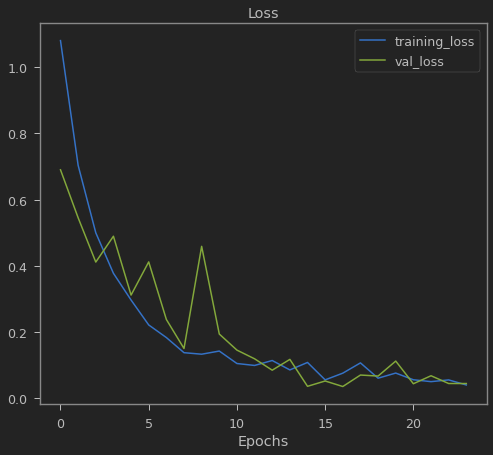

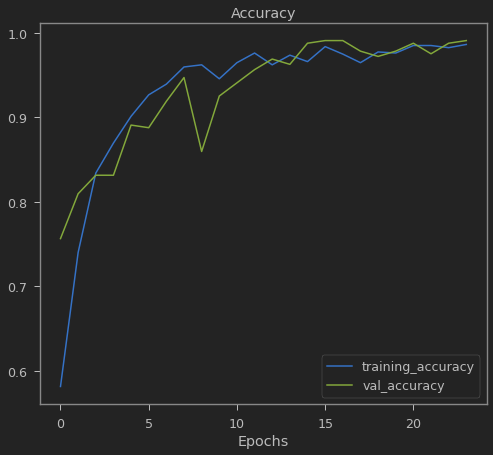

In [ ]:
plot_loss_curves(history)

#  ASSESS THE PERFORMANCE OF THE TRAINED MODEL

In [ ]:
# Load pretrained weight
model.load_weights('weights_fine.hdf5')

In [ ]:
evaluate = model.evaluate(train_generator, steps = train_generator.n // 40, verbose =1)
print('Accuracy Training : {}'.format(evaluate[0:4]))


20/20 [==============================] - 70s 3s/step - loss: 0.0243 - accuracy: 0.9900
Accuracy Training : [0.02432209439575672, 0.9900000095367432]


In [ ]:
# Evaluate the performance of the model (Akurasi di testing data)
#evaluate = model.evaluate(test_generator,
 #                         steps = len(test_generator),
 #                         verbose =2)
evaluate = model.evaluate(test_generator, steps = test_generator.n // 45, verbose =1)
print('Accuracy Test : {}'.format(evaluate[1]))


7/7 [==============================] - 45s 7s/step - loss: 1.1682 - accuracy: 0.7107
Accuracy Test : 0.7107142806053162


In [ ]:
# assigning label names to the corresponding indexes
labels = {0: 'chickenpox', 1: 'dermatofibroma', 2: 'eczema' ,3: 'keratosis', 4: 'psoriasis', 5: 'scabies'} 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Training
prediction = []
original = []
image = []
count = 0
for i in os.listdir('./training'):
  for item in os.listdir(os.path.join('./training', i)):
    #code to open the image
    img= PIL.Image.open(os.path.join('./training', i , item))
    #resizing the image to (256,256)
    img = img.resize((256,256))
    #appending image to the image list
    image.append(img)
    #converting image to array
    img = np.asarray(img, dtype= np.float32)
    #normalizing the image
    img = img / 255
    #reshaping the image in to a 4D array
    img = img.reshape(1, 256, 256, -3)
    #making prediction of the model
    predict = model.predict(img)
    #getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    #appending the predicted class to the list
    prediction.append(labels[predict])
    #appending original class to the list
    original.append(i)

In [ ]:
print(classification_report(np.asarray(original), np.array(prediction)))

                precision    recall  f1-score   support

    chickenpox       0.99      0.97      0.98       149
dermatofibroma       0.94      0.97      0.95        62
        eczema       0.98      0.99      0.99       172
     keratosis       0.99      1.00      0.99       138
     psoriasis       1.00      0.99      1.00       143
       scabies       1.00      0.99      1.00       164

      accuracy                           0.99       828
     macro avg       0.98      0.98      0.98       828
  weighted avg       0.99      0.99      0.99       828



Text(0.5, 1.0, 'Confusion_matrix')

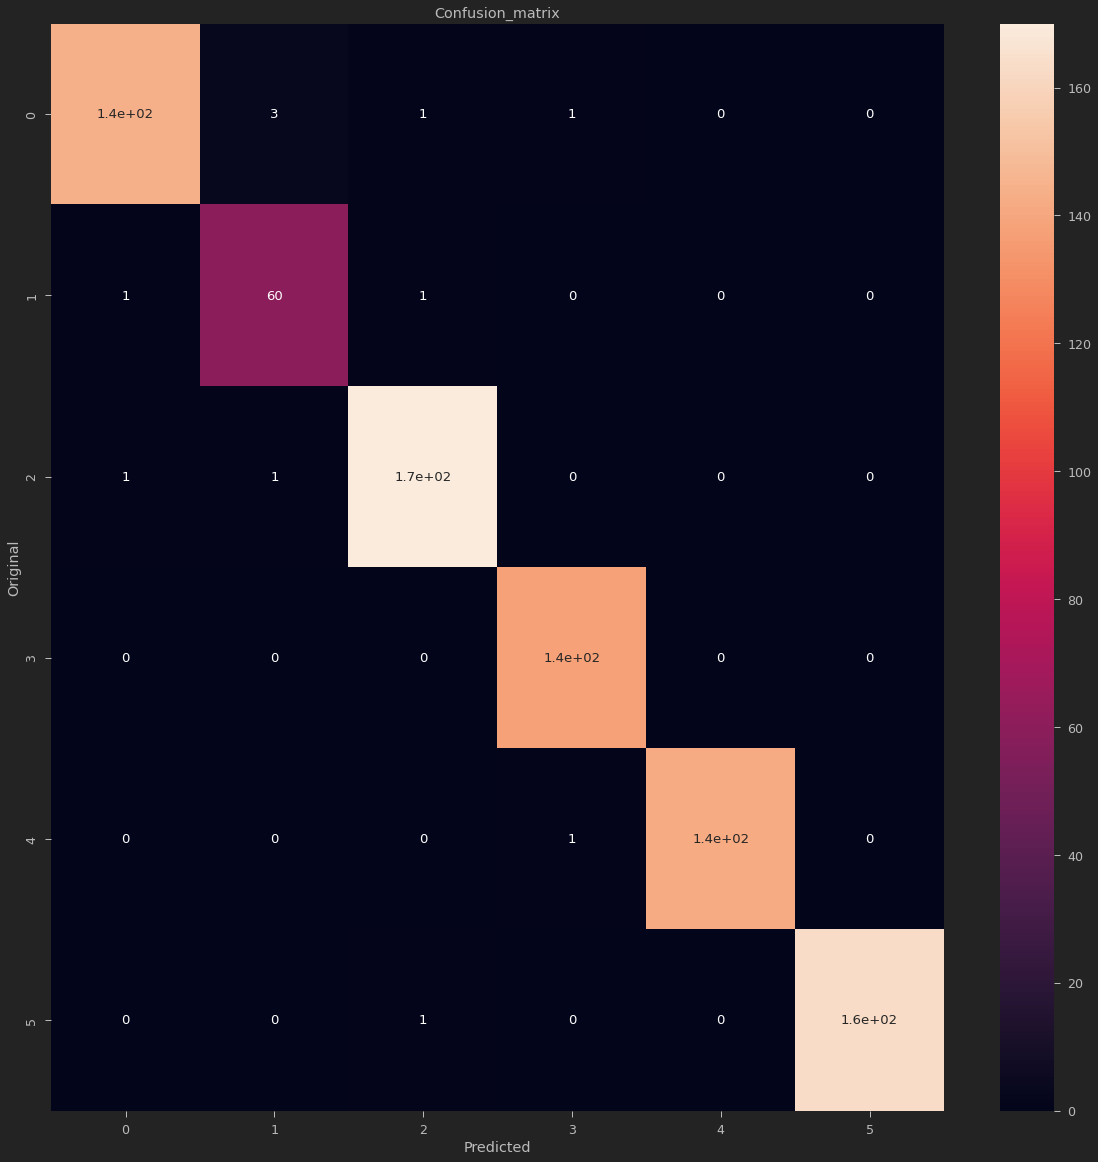

In [ ]:
# plot confusion matrix
plt.figure(figsize=(20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Testing
prediction = []
original = []
image = []
count = 0
for i in os.listdir('./evaluation'):
  for item in os.listdir(os.path.join('./evaluation', i)):
    #code to open the image
    img= PIL.Image.open(os.path.join('./evaluation', i , item))
    #resizing the image to (256,256)
    img = img.resize((256,256))
    #appending image to the image list
    image.append(img)
    #converting image to array
    img = np.asarray(img, dtype= np.float32)
    #normalizing the image
    img = img / 255
    #reshaping the image in to a 4D array
    img = img.reshape(1, 256, 256, -3)
    #making prediction of the model
    predict = model.predict(img)
    #getting the index corresponding to the highest value in the prediction
    predict = np.argmax(predict)
    #appending the predicted class to the list
    prediction.append(labels[predict])
    #appending original class to the list
    original.append(i)

In [ ]:
import random

fig=plt.figure(figsize = (120,120)) #ukuran gambar
for i in range(40):
    j = random.randint(30,len(image))
    fig.add_subplot(40,1,i+1)
    plt.xlabel("Prediction -" + prediction[j] +"   Original -" + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(classification_report(np.asarray(original), np.array(prediction)))

                precision    recall  f1-score   support

    chickenpox       0.75      0.59      0.66        78
dermatofibroma       0.51      0.85      0.64        27
        eczema       0.64      0.75      0.69        52
     keratosis       0.62      0.68      0.65        59
     psoriasis       0.76      0.78      0.77        60
       scabies       0.82      0.58      0.68        62

      accuracy                           0.68       338
     macro avg       0.68      0.71      0.68       338
  weighted avg       0.71      0.68      0.68       338



In [ ]:
#val_accuracy=[]
#print('Mean:', np.mean(val_accuracy))
#print('Standard Deviation:', np.std(val_accuracy))
